# **Assignment 5**:
**Change the code 8 or your own 4th Code from Assignment 4 to include:**
1. image normalization
2. L2 regularization
3. ReLU after BN

* Run your new code for 40 epochs and save the model with highest validation accuracy
* Find out 25 misclassified images from the validation dataset and create an image gallery
* Submit

### **Import Libraries and modules**
1. import the basic libraries
2. import libraries required for building up the model using keras
3. import the mnist dataset

In [1]:
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets
Load data from mnist dataset and split the data between training dataset and testing dataset.

###**Print and Plot**:
1. Print the shape for the trainig dataset
2. Import pyplot for plotting the input image
3. Plot the Input Image

(60000, 28, 28)


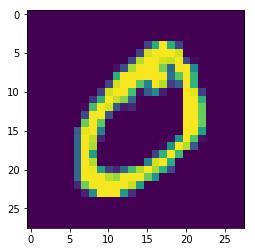

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

#**Model Creation Using Keras**
The following code defines the architecture/model of our neural network in which we will add layers in the network using keras:
1.   **Initializing a sequential model**: Stack layers on top of one another, it also ensures that the input and output sizes of successive layers are compatible. 
2.   **Adding Convolution Layers**: While adding the first convolution layer we need to specify the input size as well. In the next convolution layers we do not need an input size since they will receive the input size from the preceeding layers.
3. **Adding Max Pooling Layers**: We add them to resuce the dimensions of image extracting the maximum out of the (2,2) pool and pass them forward.
4. **Adding Flatten Layer**: When finally we reach the output size of 1X1X10, we flatten the output channel-wise into output of shape 10 (1-dimension).
5. **Adding Softmax Layer**: This layer converts the last layer outuput into probabolity distribution of 10 classes.

## DNN - Batch Normalization and Dropout


---


###Batch Normalization
> It is used to normalize the input layer by adjusting and scaling the activations. For example, when we have features from 0 to 1 and some from 1 to 1000, we should normalize them to speed up learning. 

> Batch normalization is a method we can use to normalize the inputs of each layer, in order to fight the **internal covariate shift** problem.
Batch normalization allows each layer of a network to learn by itself a little bit more independently of other layers.

> **Internal covariate shift** -  Each layer must learn to adapt themselves to a new distribution in every training step which slows down the training process.

**Steps for BN:**
1. Calculate the mean and variance of the layers input.
2. Normalize the layer inputs using the previously calculated batch statistics.
3. Scale and shift in order to obtain the output of the layer.
**P.S - γ and β are learned during training along with the original parameters of the network.**


---


###Dropout
> The term “Dropout” refers to dropping out units (both hidden and visible) in a neural network. Dropout ignores units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.

> Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.During training, some number of layer outputs are randomly ignored or “dropped out.”
####Why do we need Dropout?

> To prevent over-fitting


---

Total params: 16,604

Trainable params: 16,360

Non-trainable params: 244

---

### Model Architecture

In [13]:
########################################
model = Sequential()
########################################

# All shapes are in the form [height, width, num_channels]

# INPUT SIZE : [28, 28, 1] | OUTPUT SIZE : [26, 26, 16] | GRF_of_input : [1, 1]
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# INPUT SIZE : [26, 26, 16] | OUTPUT SIZE : [24, 24, 32] | GRF_of_input : [3, 3]
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# INPUT SIZE : [24, 24, 32] | OUTPUT SIZE : [24, 24, 10] | GRF_of_input : [5, 5]
model.add(Convolution2D(10, 1, 1, activation='relu'))

########################################

# INPUT SIZE : [24, 24, 10] | OUTPUT SIZE : [12, 12, 10] | GRF_of_input : [5, 5]
model.add(MaxPooling2D(pool_size=(2, 2)))
########################################
# INPUT SIZE : [12, 12, 10] | OUTPUT SIZE : [10, 10, 16] | GRF_of_input : [10, 10]
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


# INPUT SIZE : [10, 10, 16] | OUTPUT SIZE : [8, 8, 16] | GRF_of_input : [12, 12]
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


# INPUT SIZE : [8, 8, 16] | OUTPUT SIZE : [6, 6, 16] | GRF_of_input : [14, 14]
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


# INPUT SIZE : [6, 6, 16] | OUTPUT SIZE : [4, 4, 16] | GRF_of_input : [16, 16]
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


# INPUT SIZE : [4, 4, 16] | OUTPUT SIZE : [1, 1, 10] | GRF_of_input : [18, 18]
model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))

########################################

# INPUT SIZE : [1, 1, 10] | OUTPUT SIZE : [10] | GRF_of_input : [22, 22]
model.add(Flatten())

# INPUT SIZE : [10] | OUTPUT SIZE : [10] | GRF_of_input : [22, 22]
model.add(Activation('softmax'))
########################################

# Printing out the model summary
model.summary()

# saving the model to reload model with initial weights while trying out different optimizations
model.save_weights('model.h5')
########################################

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_15 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 10)        330       
__________

### Defining LR Scheduler

**Learning Rate**
The amount of change to the model during each step of this search process, or the step size, is called the “learning rate”. 

Learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0.

During training, the backpropagation of error estimates the amount of error for which the weights of a node in the network are responsible. Instead of updating the weight with the full amount, it is scaled by the learning rate.

Learning rate controls how quickly or slowly a neural network model learns a problem.

> **Large learning rate** allows the model to learn faster, at the cost of arriving on a sub-optimal final set of weights.

> **Small learning rate** may allow the model to learn a more optimal or even globally optimal set of weights but may take significantly longer to train.

### Need for Learning Rate Schedules
**Benefits:**
1. Converge faster
2. Higher accuracy

---

**We tried our model with 3 initial learning rate:**
1. LR-0.003, epochs=20, Validation Accuracy = 99.46%
2. LR-0.01, epochs=20, Validation Accuracy = 99.42%
3. LR-0.1, epochs=30, Validation Accuracy = 99.44%

---


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#########################################################################

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(lr * 1/(1 + 0.319 * epoch), 10)
#########################################################################

#### LR - 0.003

In [14]:
#########################################################################
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
model.load_weights('model.h5')
model.fit(X_train, Y_train, 
          batch_size=128, 
          epochs=20, 
          verbose=1, 
          validation_data=(X_test, Y_test), 
          callbacks=[LearningRateScheduler(scheduler, verbose=1)])

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
#########################################################################
# [0.019468824124510866, 0.9946] LR - 0.003; epochs 20; 
# [0.019800396383114274, 0.9942] LR - 0.01; epochs 20; [0.01, 0.0075815011, 0.00141623 ]
# [0.019371943644070144, 0.9944] LR - 0.1; epochs 30; [0.1, 0.0758150114, 0.0097551458 ] loss: 0.0823 - acc: 0.9571 - val_loss: 0.0194 - val_acc: 0.9944

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 14s 229us/step - loss: 0.5032 - acc: 0.8595 - val_loss: 0.0883 - val_acc: 0.9846
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 12s 193us/step - loss: 0.2495 - acc: 0.9268 - val_loss: 0.0592 - val_acc: 0.9871
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 12s 193us/step - loss: 0.1962 - acc: 0.9415 - val_loss: 0.0447 - val_acc: 0.9901
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 12s 193us/step - loss: 0.1644 - acc: 0.9490 - val_loss: 0.0346 - val_acc: 0.9912
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

#### LR - 0.1

In [23]:
#########################################################################
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.1), metrics=['accuracy'])
model.load_weights('model.h5')
model.fit(X_train, Y_train, 
          batch_size=128, 
          epochs=30, 
          verbose=1, 
          validation_data=(X_test, Y_test), 
          callbacks=[LearningRateScheduler(scheduler, verbose=1)])

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
#########################################################################

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.1.
60000/60000 [==============================] - 16s 264us/step - loss: 0.3117 - acc: 0.8919 - val_loss: 0.0857 - val_acc: 0.9748
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0758150114.
60000/60000 [==============================] - 12s 197us/step - loss: 0.1613 - acc: 0.9365 - val_loss: 0.0654 - val_acc: 0.9796
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0610500611.
60000/60000 [==============================] - 12s 196us/step - loss: 0.1386 - acc: 0.9441 - val_loss: 0.0607 - val_acc: 0.9832
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0510986203.
60000/60000 [==============================] - 12s 196us/step - loss: 0.1256 - acc: 0.9470 - val_loss: 0.0491 - val_acc: 0.9855
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0439367311.
60000/60000 [====

# Using Image Normalization

##Normalizing image inputs
* Data normalization is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. 
* This makes convergence faster while training the network. 
* Data normalization is done by subtracting the mean from each pixel and then dividing the result by the standard deviation.
* The distribution of such data would resemble a Gaussian curve centered at zero.
* For image inputs we need the pixel numbers to be positive, so we might choose to scale the normalized data in the range [0,1].
* In this process for each feature to have a similar range so that our gradients don't go out of control 

### ImageDataGenerator
* Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).
* defines the configuration for image data preparation and augmentation.

> #### This includes capabilities such as:
1. Sample-wise standardization.
2. Feature-wise standardization.
3. ZCA whitening.
4. Random rotation, shifts, shear and flips.
5. Dimension reordering.
6. Save augmented images to disk.

>#### Fit
* Fits the data generator to some sample data.
* This computes the internal data stats related to the data-dependent transformations, based on an array of sample data.
* Only required if featurewise_center or featurewise_std_normalization or zca_whitening are set to True.

>#### Flow
* Takes data & label arrays, generates batches of augmented data.
* We can configure the batch size and prepare the data generator and get batches of images by calling the flow() function.



In [45]:
# https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


#########################################################################
# Image Normalization

# Create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# Calculate the mean on the trainng dataset
datagen.fit(X_train)
print("Data Generator mean=%.3f, std=%.3f" % (datagen.mean, datagen.std))

# We can configure the batch size and prepare the data generator and get batches of images by calling the flow() function.
iterator = datagen.flow(X_train, Y_train, batch_size=128)

#########################################################################

Data Generator mean=33.318, std=78.567


#### We tried Normalized Image Data with 3 initial learning rate:
1. LR-0.003, epochs=20, Validation Accuracy = 72.88%
2. LR-0.1, epochs=30, Validation Accuracy = 79.31%
3. LR- 1, epochs=30, Validation Accuracy = 76.60%

#### LR - 0.003

In [16]:
#########################################################################
iterator = datagen.flow(X_train, Y_train, batch_size=128)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
model.load_weights('model.h5')
model.fit_generator(iterator, 
                    samples_per_epoch=len(X_train), 
                    epochs=20,
                    verbose=1, 
                    validation_data=(X_test, Y_test), 
                    callbacks=[LearningRateScheduler(scheduler, verbose=1)])
#########################################################################
# [3.4018, 0.7288]            LR - 0.003; epochs 20; [0.003, 0.0022744503, ...  0.000424869]; loss: 0.0766 - acc: 0.9606 - val_loss: 3.4018 - val_acc: 0.7288
# [2.930216279411316, 0.7931] LR - 0.1;   epochs 30; [0.1, 0.0758150114  0.0097551458];       loss: 0.0790 - acc: 0.9597 - val_loss: 2.9302 - val_acc: 0.7931
# [3.512940872049332, 0.766]  LR - 1.0 ;  epochs 30; [1.0, 0.7581501137, ...  0.097551458];   loss: 0.0871 - acc: 0.9558 - val_loss: 3.5129 - val_acc: 0.7660

Data Generator mean=33.318, std=78.567
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
  5/468 [..............................] - ETA: 15s - loss: 0.0814 - acc: 0.9641

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=20, verbose=1, validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=468)`


468/468 [==============================] - 13s 28ms/step - loss: 0.1149 - acc: 0.9529 - val_loss: 3.0290 - val_acc: 0.7643
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
468/468 [==============================] - 13s 28ms/step - loss: 0.1019 - acc: 0.9542 - val_loss: 2.9588 - val_acc: 0.7626
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
468/468 [==============================] - 13s 28ms/step - loss: 0.0977 - acc: 0.9552 - val_loss: 3.0986 - val_acc: 0.7417
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
468/468 [==============================] - 13s 28ms/step - loss: 0.0932 - acc: 0.9561 - val_loss: 2.7389 - val_acc: 0.7648
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
468/468 [==============================] - 13s 28ms/step - loss: 0.0924 - acc: 0.9569 - val_loss: 3.2153 - val_acc: 0.7468
Epoch 6/20

Epoch 00006: LearningRateSche

#### LR - 0.1

In [25]:
#########################################################################
iterator = datagen.flow(X_train, Y_train, batch_size=128)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.1), metrics=['accuracy'])
model.load_weights('model.h5')
model.fit_generator(iterator, 
                    samples_per_epoch=len(X_train), 
                    epochs=30,
                    verbose=1, 
                    validation_data=(X_test, Y_test), 
                    callbacks=[LearningRateScheduler(scheduler, verbose=1)])
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
#########################################################################
# [2.930216279411316, 0.7931] LR - 0.1; epochs 30; [0.1, 0.0758150114  0.0097551458]; loss: 0.0790 - acc: 0.9597 - val_loss: 2.9302 - val_acc: 0.7931


Data Generator mean=33.318, std=78.567


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=30, verbose=1, validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=468)`


Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.1.
468/468 [==============================] - 19s 40ms/step - loss: 0.3236 - acc: 0.8886 - val_loss: 4.1423 - val_acc: 0.7236
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0758150114.
468/468 [==============================] - 13s 28ms/step - loss: 0.1594 - acc: 0.9374 - val_loss: 4.9719 - val_acc: 0.6520
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0610500611.
468/468 [==============================] - 13s 28ms/step - loss: 0.1365 - acc: 0.9430 - val_loss: 4.6084 - val_acc: 0.6851
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0510986203.
468/468 [==============================] - 13s 28ms/step - loss: 0.1263 - acc: 0.9469 - val_loss: 4.1723 - val_acc: 0.7232
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0439367311.
468/468 [==============================] - 13s 28ms/step - loss: 0.1147 - acc: 0.9493 -

#### LR - 1.0

In [26]:
#########################################################################
iterator = datagen.flow(X_train, Y_train, batch_size=128)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0), metrics=['accuracy'])
model.load_weights('model.h5')
model.fit_generator(iterator, 
                    samples_per_epoch=len(X_train), 
                    epochs=30,
                    verbose=1, 
                    validation_data=(X_test, Y_test), 
                    callbacks=[LearningRateScheduler(scheduler, verbose=1)])
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
#########################################################################
# [3.512940872049332, 0.766] LR - 1.0 ; epochs 30; [1.0, 0.7581501137, ...  0.097551458]; loss: 0.0871 - acc: 0.9558 - val_loss: 3.5129 - val_acc: 0.7660

Data Generator mean=33.318, std=78.567


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=30, verbose=1, validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=468)`


Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 1.0.
468/468 [==============================] - 19s 41ms/step - loss: 0.4182 - acc: 0.8579 - val_loss: 12.1804 - val_acc: 0.2379
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.7581501137.
468/468 [==============================] - 13s 29ms/step - loss: 0.1981 - acc: 0.9269 - val_loss: 6.7029 - val_acc: 0.5585
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.6105006105.
468/468 [==============================] - 13s 29ms/step - loss: 0.1666 - acc: 0.9364 - val_loss: 6.7428 - val_acc: 0.5579
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.5109862034.
468/468 [==============================] - 13s 28ms/step - loss: 0.1482 - acc: 0.9407 - val_loss: 5.6320 - val_acc: 0.6296
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.4393673111.
468/468 [==============================] - 13s 28ms/step - loss: 0.1413 - acc: 0.9411 

# Applying L2 regularization

### Regularization
* This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.
* Regularization, significantly reduces the variance of the model, without substantial increase in its bias.
* Regularization is a technique to discourage the complexity of the model. It does this by penalizing the loss function.
* Regularization works on assumption that smaller weights generate simpler model and thus helps avoid overfitting.

####Two among many Regularization techniques commonly used are:
1. **L1 Regularization [Lasso Regression]** - Least Absolute Shrinkage and Selection Operator adds “absolute value of magnitude” of coefficient as penalty term to the loss function.
<figure>
<img src='https://miro.medium.com/max/267/1*jgWOhDiGjVp-NCSPa5abmg.png' />
</figure>

2. **L2 Regularization [Ridge Regression]** - Adds “squared magnitude” of coefficient as penalty term to the loss function.
<figure>
<img src='https://miro.medium.com/max/264/1*4MlW1d3xszVAGuXiJ1U6Fg.png' />
</figure>
* The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.


 












###Playing with Network Layer's Weights

In [39]:
# in total = 25 layers in the model
"""
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_15 (Dropout)         (None, 26, 26, 16)        0         
"""
#####################
# Layers in the network
print("Total Number of layers in the network = ", len(model.layers)) # 25 layers
# print(len(model.layers[0].get_weights())) # 2 - Weights and Bias

#####################
## Weights ##
# print(len(model.layers[0].get_weights()[0])) # 3 [kernel lenght]
# print(len(model.layers[0].get_weights()[0][0])) # 3 [kernel breadth]
# print(len(model.layers[0].get_weights()[0][0][0])) # 1
# print(len(model.layers[0].get_weights()[0][0][0][0])) # 16 kernels used

print("Printing 3X3X16 weights = ", (model.layers[0].get_weights()[0])) # print 
#####################
## Bias ##
print(len(model.layers[0].get_weights()[1]))
print("Printing 16 Bias = ", (model.layers[0].get_weights()[1]))
#####################

Total Number of layers in the network =  25
2
Printing 3X3X16 weights =  [[[[-2.1873840e+01  1.8829962e+01 -6.5906892e+00 -1.2896430e+01
     2.0089771e+01  2.4444301e+00  9.9514465e+00  7.4230903e-01
    -1.3540105e+01  6.3781199e+00 -1.3767236e+01 -7.4635845e-01
     3.5003061e+00  1.0436450e+01  7.8123007e+00 -4.2900329e+00]]

  [[-1.9227097e+01 -1.6605350e+01 -1.2980994e+01 -3.5311306e+01
     1.4055423e+01  5.4505258e+00 -1.2234921e+01  1.9503735e+01
    -1.7080641e+01  1.3780191e+01  9.7480679e+00 -2.1409992e+01
     1.4395055e+01  8.6534691e+00  9.1757879e+00 -5.0676451e+00]]

  [[-5.2524800e+00 -2.7742958e+01 -9.3566113e+00  8.6971319e-01
     1.3313248e+01  1.0907667e+01 -2.6824421e+01  9.7205162e+00
     3.0619280e+00  3.7053032e+01  1.8988211e+01 -2.6007935e+01
     1.5351596e+01 -2.2785675e+01 -8.7142820e+00 -6.5434661e+00]]]


 [[[ 2.8670868e+01  4.2611694e+01 -1.6140779e+01  4.6697664e+00
     2.4490047e+00 -1.8967342e+01  1.9364622e+01 -2.1358385e+01
    -1.6665045e+01 -

### Defining Custom Loss with L2 Regularization

In [0]:
#########################################################################
# Regularization Code
import keras.backend as KBackend
lambd = 0.01

def reg_term(lambd):
    w2=0
    for i in range(len(model.layers)):
        if len(model.layers[i].get_weights()) > 0:
            t = np.sum(model.layers[i].get_weights()[0] * model.layers[i].get_weights()[0])
            w2=w2+t
    w2 = w2*(lambd/2*X_train.shape[0])
    return w2

def loss_l2(y_true, y_pred):
    return KBackend.categorical_crossentropy(y_true, y_pred)+ reg_term(lambd)
#########################################################################


##We tried L2 Regularization with:
**1. Without Image Normalization**

**2. With Image Normalization**


### Without Image Normalization
1. **With Initial LR-0.01**: epochs=20, Validation Accuracy = 99.32%
2. **With Initial LR-0.1**: epochs=20, Validation Accuracy = 99.48%

In [0]:
### Preparing the Un-Normalized Data for the model.

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### LR 0.01

In [42]:
model.compile(loss=loss_l2, optimizer=Adam(lr=0.01), metrics=['accuracy'])
model.load_weights('model.h5')
model.fit(X_train, Y_train, 
          batch_size=128, 
          epochs=20, 
          verbose=1, 
          validation_data=(X_test, Y_test), 
          callbacks=[LearningRateScheduler(scheduler, verbose=1)])

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
#########################################################################
# [0.019800396383114274, 0.9942] LR - 0.01; epochs 20; [0.01, 0.0075815011, 0.00141623 ]
# [22743352.0, 0.9932]           LR - 0.01; epochs 20; [0.01, 0.0075815011, 0.00141623 ]; loss: 22743352.0000 - acc: 0.9586 - val_loss: 22743352.0000 - val_acc: 0.9932

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
60000/60000 [==============================] - 18s 305us/step - loss: 22743352.0213 - acc: 0.8931 - val_loss: 22743354.0000 - val_acc: 0.0982
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0075815011.
60000/60000 [==============================] - 12s 199us/step - loss: 22743352.0000 - acc: 0.9432 - val_loss: 22743352.0000 - val_acc: 0.9254
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0061050061.
60000/60000 [==============================] - 12s 198us/step - loss: 22743352.0000 - acc: 0.9485 - val_loss: 22743352.0000 - val_acc: 0.9893
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.005109862.
60000/60000 [==============================] - 12s 199us/step - loss: 22743352.0000 - acc: 0.9503 - val_loss: 22743352.0000 - val_acc: 0.9892
Epoch 5/20

Epoch 00005: LearningRateScheduler 

####LR 0.1

In [41]:
model.compile(loss=loss_l2, optimizer=Adam(lr=0.1), metrics=['accuracy'])
model.load_weights('model.h5')
model.fit(X_train, Y_train, 
          batch_size=128, 
          epochs=30, 
          verbose=1, 
          validation_data=(X_test, Y_test), 
          callbacks=[LearningRateScheduler(scheduler, verbose=1)])

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
#########################################################################
# [0.019371943644070144, 0.9944] LR - 0.1; epochs 30; [0.1, 0.0758150114, 0.0097551458 ]; loss: 0.0823 -        acc: 0.9571 - val_loss: 0.0194 -        val_acc: 0.9944 
# [24289262.2624,        0.9948] LR - 0.1; epochs 30; [0.1, 0.0758150114, 0.0097551458 ]; loss: 24289263.8848 - acc: 0.9585 - val_loss: 24289262.5632 - val_acc: 0.9948

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.1.
60000/60000 [==============================] - 18s 300us/step - loss: 24289264.0000 - acc: 0.8830 - val_loss: 24289263.6384 - val_acc: 0.9638
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0758150114.
60000/60000 [==============================] - 12s 196us/step - loss: 24289263.9915 - acc: 0.9349 - val_loss: 24289263.4592 - val_acc: 0.9783
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0610500611.
60000/60000 [==============================] - 12s 197us/step - loss: 24289263.9915 - acc: 0.9416 - val_loss: 24289263.0752 - val_acc: 0.9861
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0510986203.
60000/60000 [==============================] - 12s 197us/step - loss: 24289263.9573 - acc: 0.9462 - val_loss: 24289262.9472 - val_acc: 0.9882
Epoch 5/30

Epoch 00005: LearningRateScheduler 

### With Image Normalization
1. **With Initial LR-0.1**: epochs=20, Validation Accuracy = 48.56%

In [56]:
### Preparing Normalized date for the model.
#########################################################################
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#########################################################################
# Image Normalization

# Create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# Calculate the mean on the trainng dataset
datagen.fit(X_train)
print("Data Generator mean=%.3f, std=%.3f" % (datagen.mean, datagen.std))

# We can configure the batch size and prepare the data generator and get batches of images by calling the flow() function.
iterator = datagen.flow(X_train, Y_train, batch_size=128)
#########################################################################

Data Generator mean=33.318, std=78.567


####LR 0.1

In [57]:
#########################################################################
iterator = datagen.flow(X_train, Y_train, batch_size=128)

model.compile(loss=loss_l2, optimizer=Adam(lr=0.1), metrics=['accuracy'])
model.load_weights('model.h5')
model.fit_generator(iterator, 
                    samples_per_epoch=len(X_train), 
                    epochs=30,
                    verbose=1, 
                    validation_data=(X_test, Y_test), 
                    callbacks=[LearningRateScheduler(scheduler, verbose=1)])
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

#########################################################################
# [2.930216279411316, 0.7931] LR - 0.1;   epochs 30; [0.1, 0.0758150114  0.0097551458];       loss: 0.0790 - acc: 0.9597 - val_loss: 2.9302 - val_acc: 0.7931
# [6729249.6336, 0.4856]      LR - 0.1;   epochs 30; [0.1, 0.0758150114  0.0097551458];       loss: 6729242.0000 - acc: 0.9542 - val_loss: 6729249.6336 - val_acc: 0.4856

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=30, verbose=1, validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=468)`
  


Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.1000000015.
468/468 [==============================] - 23s 50ms/step - loss: 6729242.1165 - acc: 0.8919 - val_loss: 6729249.2976 - val_acc: 0.5282
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0758150125.
468/468 [==============================] - 14s 30ms/step - loss: 6729242.0021 - acc: 0.9374 - val_loss: 6729252.6336 - val_acc: 0.3160
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0462851127.
468/468 [==============================] - 14s 30ms/step - loss: 6729242.0021 - acc: 0.9441 - val_loss: 6729249.0272 - val_acc: 0.5220
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0236510534.
468/468 [==============================] - 14s 30ms/step - loss: 6729242.0000 - acc: 0.9492 - val_loss: 6729249.5968 - val_acc: 0.4866
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0103915001.
468/468 [=====================

# Relu After BN
### Creating the Model by appling Relu Activation Function after the Batch Normalization Layer.

### Model Architecture


In [62]:
########################################
model2 = Sequential()
########################################

# All shapes are in the form [height, width, num_channels]

# INPUT SIZE : [28, 28, 1] | OUTPUT SIZE : [26, 26, 16] | GRF_of_input : [1, 1]
model2.add(Convolution2D(16, 3, 3, input_shape=(28,28,1)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

model2.add(Dropout(0.1))

# INPUT SIZE : [26, 26, 16] | OUTPUT SIZE : [24, 24, 32] | GRF_of_input : [3, 3]
model2.add(Convolution2D(32, 3, 3))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

# INPUT SIZE : [24, 24, 32] | OUTPUT SIZE : [24, 24, 10] | GRF_of_input : [5, 5]
model2.add(Convolution2D(10, 1, 1, activation='relu'))

########################################
# INPUT SIZE : [24, 24, 10] | OUTPUT SIZE : [12, 12, 10] | GRF_of_input : [5, 5]
model2.add(MaxPooling2D(pool_size=(2, 2)))
########################################

# INPUT SIZE : [12, 12, 10] | OUTPUT SIZE : [10, 10, 16] | GRF_of_input : [10, 10]
model2.add(Convolution2D(16, 3, 3))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

# INPUT SIZE : [10, 10, 16] | OUTPUT SIZE : [8, 8, 16] | GRF_of_input : [12, 12]
model2.add(Convolution2D(16, 3, 3))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

# INPUT SIZE : [8, 8, 16] | OUTPUT SIZE : [6, 6, 16] | GRF_of_input : [14, 14]
model2.add(Convolution2D(16, 3, 3))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

# INPUT SIZE : [6, 6, 16] | OUTPUT SIZE : [4, 4, 16] | GRF_of_input : [16, 16]
model2.add(Convolution2D(16, 3, 3))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

# INPUT SIZE : [4, 4, 16] | OUTPUT SIZE : [1, 1, 10] | GRF_of_input : [18, 18]
model2.add(Convolution2D(10, 4, 4))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

########################################

# INPUT SIZE : [1, 1, 10] | OUTPUT SIZE : [10] | GRF_of_input : [22, 22]
model2.add(Flatten())

# INPUT SIZE : [10] | OUTPUT SIZE : [10] | GRF_of_input : [22, 22]
model2.add(Activation('softmax'))
########################################
# Printing out the model summary
model2.summary()

# saving the model to reload model with initial weights while trying out different optimizations
model2.save_weights('model_ReluAfterBN.h5')
########################################

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)        0         
__________

## Training and Testing
* ### Using 40 epochs
* ### Saving Best Validation Accuracy Model using Checkpoint in Keras
* ### Model File Name = Model_bestValAccuracy.hdf5

### Results:
1. LR=0.1, Epochs = 40, Validation Accuracy = 72.08%
2. LR=0.1, Epoch = 3, Validation Accuracy = 78.84% 
>**[Epoch 3 has best validation accuracy in 30 epochs]**

In [64]:
from keras.callbacks import ModelCheckpoint
#########################################################################
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#########################################################################
# Image Normalization

# Create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# Calculate the mean on the trainng dataset
datagen.fit(X_train)
print("Data Generator mean=%.3f, std=%.3f" % (datagen.mean, datagen.std))

# Demonstrate effect on a single batch of samples
# We can configure the batch size and prepare the data generator and get batches of images by calling the flow() function.
iterator = datagen.flow(X_train, Y_train, batch_size=128)

#########################################################################

model2.compile(loss=loss_l2, optimizer=Adam(lr=0.1), metrics=['accuracy'])
model2.load_weights('model_ReluAfterBN.h5')

# checkpoint
filepath="Model_bestValAccuracy.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model2.fit_generator(iterator, 
                    samples_per_epoch=len(X_train), 
                    epochs=40,
                    verbose=1, 
                    validation_data=(X_test, Y_test), 
                    callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])
score = model2.evaluate(X_test, Y_test, verbose=0)
print(score)

#########################################################################
# [6472157.252, 0.7208]  LR - 0.1; epochs 30; [0.1, 0.0758150114  0.0097551458]; loss: 6472153.0064 - acc: 0.9503 - val_loss: 6472157.2792 - val_acc: 0.7208 # after 40 epochs
# [6472156.0576, 0.7874] LR - 0.1; epochs 3; [0.1, 0.0758150114  0.0097551458]; loss: 6472153.0064 - acc: 0.9415 - val_loss: 6472156.0576 - val_acc: 0.7874 # best Model


Data Generator mean=33.318, std=78.567


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=40, verbose=1, validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=468)`


Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.1000000015.
468/468 [==============================] - 24s 52ms/step - loss: 6472153.1549 - acc: 0.8810 - val_loss: 6472159.8880 - val_acc: 0.5577

Epoch 00001: val_acc improved from -inf to 0.55770, saving model to Model_bestValAccuracy.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0758150125.
468/468 [==============================] - 14s 30ms/step - loss: 6472153.0203 - acc: 0.9315 - val_loss: 6472156.3264 - val_acc: 0.7776

Epoch 00002: val_acc improved from 0.55770 to 0.77760, saving model to Model_bestValAccuracy.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0462851127.
468/468 [==============================] - 14s 30ms/step - loss: 6472153.0064 - acc: 0.9415 - val_loss: 6472156.0576 - val_acc: 0.7874

Epoch 00003: val_acc improved from 0.77760 to 0.78740, saving model to Model_bestValAccuracy.hdf5
Epoch 4/40

Epoch 00004: LearningRateSchedu

# Find out 25 misclassified images from the validation dataset and create an image gallery

### Creating array of first 25 misclassified images

In [85]:
count = 0
misclassified_images = [] # index, original, predicted
model2.load_weights('Model_bestValAccuracy.hdf5')
for idx, single_prediction in enumerate(model2.predict(X_test)):
    # print(np.argmax(single_prediction), y_test[idx])
    predicted_class = np.argmax(single_prediction)
    if(predicted_class != y_test[idx]):
      count+=1
      misclassified_images.append((idx, y_test[idx], predicted_class))
      if(count==25):
        break

print(misclassified_images)

[(7, 9, 4), (8, 5, 4), (9, 9, 7), (18, 3, 2), (20, 9, 7), (29, 1, 2), (31, 1, 4), (37, 1, 2), (46, 1, 2), (61, 8, 5), (64, 7, 2), (65, 4, 2), (73, 9, 3), (78, 9, 3), (84, 8, 2), (92, 9, 3), (94, 1, 2), (96, 1, 2), (97, 7, 2), (110, 8, 2), (111, 7, 2), (114, 7, 2), (115, 4, 9), (118, 9, 7), (128, 8, 2)]


### Plotting Image Gallery of Misclassified Images

<Figure size 1440x1440 with 0 Axes>

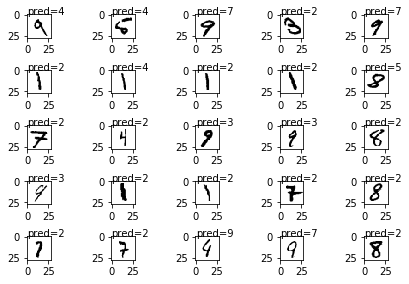

In [119]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots(5, 5)
fig.tight_layout()
for index, (img_idx, original, prediction) in enumerate(misclassified_images):
  plt.subplot(5, 5, index+1)
  plottable_image = np.reshape(X_test[img_idx], (28, 28))
  plt.text(0, 0, 'pred=' + str(prediction))

  plt.imshow(plottable_image, cmap='binary')